# Modeling Notebook

The regression models that are used in this notebook are
1. Linear Regression
2. Lasso Regression
3. Ridge Regression
4. XG Boost Regression
5. Random Forest Regression
6. Neural Newtworks Regression
The decision to use some of these regression models comes from the blog post from jigsawacademy.com


In [1]:
import pandas as pd
import pickle
import numpy as np

# models
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.dummy import DummyRegressor

# metrics for analysis
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# used for tuning
from sklearn.model_selection import  GridSearchCV

# for graphing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Loading in the final dataframe from the working notebook 

In [2]:
with open('cars.pkl', 'rb') as carpickle:
    cars_df=pickle.load(carpickle)

In [3]:
# with open('cars_witthout_drive_size_paint_NaN.pkl', 'rb') as carpickles:
#     cars_limited_df=pickle.load(carpickles)
# secondary dataset that my local machine continues to not be able to allocate memory for

In [4]:
# Doing the train test split on the cars_df dataset where y will just have our target and X will have everything but our 
# target and model column
X= cars_df.drop(['model','price'], axis=1)
y= cars_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Start of the Models

In [5]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)
print(dummy_regr.score(X_train, y_train))
print(dummy_regr.score(X_test, y_test))

0.0
-0.00015924886381046832


In [6]:
# Making a dataframe of the continous variables as to find a correlation between all of them to see whcih one will be used
# as a simple version of Linear Regression
integers = cars_df[['odometer','price', 'year']]

<AxesSubplot:>

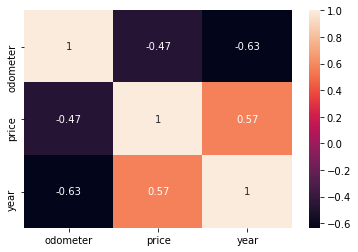

In [7]:
# Creating a heat map as to display the correlation values from the integers dataframe
corr = integers.corr(method='pearson')
sns.heatmap(corr, annot=True)

### Linear Regression with just the most correlated continous feature

In [8]:
simple_df = pd.concat([cars_df['price'], cars_df['year']], axis=1) #Making a dataframe  of just price and year
# Setting up train test split
X_simple = simple_df.drop('price', axis=1)
y_simple = simple_df['price']
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y_simple, test_size=.2, random_state=42)

# Modeling
SimpleSimpleLinearRegression = LinearRegression() #Saving the linear regression model within the variable
SimpleSimpleLinearRegression.fit(X_train_s, y_train_s)  #fitting the model onto the training data
print(SimpleSimpleLinearRegression.score(X_train_s, y_train_s)) #printing out the R-squared on the training data

print(SimpleSimpleLinearRegression.score(X_test_s, y_test_s)) #printing out the R-squared

# Predicting the price using the model
y_hat_train_s = np.exp(SimpleSimpleLinearRegression.predict(X_train_s))  
#saving the prediction values of the X_train_s within the variable

y_hat_test_s = np.exp(SimpleSimpleLinearRegression.predict(X_test_s))
#saving the prediction values of the X_test_s within the variable


# Saving the mean squared error within these variables, need to use np.exp to unlog the prediction since the target was 
# logged
train_mse_s = mean_squared_error(np.exp(y_train_s), y_hat_train_s)
test_mse_s = mean_squared_error(np.exp(y_test_s), y_hat_test_s)
# Getting the rsme
test_rmse_s = np.sqrt(test_mse_s)

# printing values
print('Train Mean Squarred Error:', train_mse_s)
print('Test Mean Squarred Error:', test_mse_s)
print('Test RMSE: ', test_rmse_s)

0.3250902942556946
0.3270986539314874
Train Mean Squarred Error: 97139077.8418655
Test Mean Squarred Error: 95377911.162922
Test RMSE:  9766.161536802572


In [9]:
# Created a second train test split to test to see an error but will leave it in since the random state is the same as the
# other train test splits therefore the model will see the same data
X= cars_df.drop(['model','price'], axis=1)
y= cars_df['price']
X_train_SL, X_test_SL, y_train_SL, y_test_SL = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression with all the features

In [11]:
SimpleLinearRegression = LinearRegression() #Creating new instance for linear regression
SimpleLinearRegression.fit(X_train_SL, y_train_SL) #fitting the model onto the training data
print(SimpleLinearRegression.score(X_train_SL,y_train_SL))#printing out the R-squared on the training data

print(SimpleLinearRegression.score(X_test_SL, y_test_SL))#printing out the R-squared on the testing data

# Predicting the price using the model
y_hat_train_s = np.exp(SimpleLinearRegression.predict(X_train_SL))
#saving the prediction values of the X_train_SL within the variable
y_hat_test_s = np.exp(SimpleLinearRegression.predict(X_test_SL))
#saving the prediction values of the X_test_SL within the variable


# Saving the mean squared error within these variables, need to use np.exp to unlog the prediction since the target was 
# logged
train_mse_s = mean_squared_error(np.exp(y_train_SL), y_hat_train_s)
test_mse_s = mean_squared_error(np.exp(y_test_SL), y_hat_test_s)
# getting the rsme
test_rmse_s = np.sqrt(test_mse_s)

# printing values
print('Train Mean Squarred Error:', train_mse_s)
print('Test Mean Squarred Error:', test_mse_s)
print('Test RMSE: ', test_rmse_s)

0.6438537485047916
0.6453226255625695
Train Mean Squarred Error: 35637273.42204408
Test Mean Squarred Error: 35554498.01104934
Test RMSE:  5962.759261537341


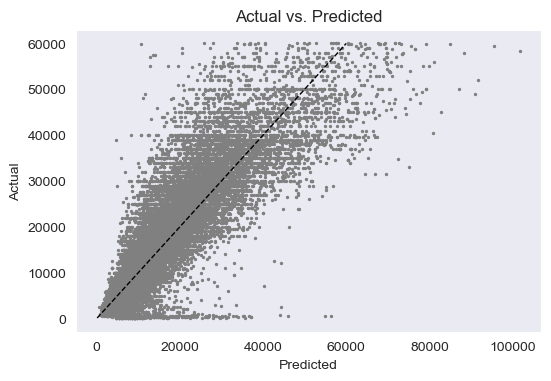

In [69]:
# Creating a scatter plot to visualoze the linear regressor
y_prediction = y_hat_test_s
y_actual = np.exp(y_test_SL)
act_fig, ax = plt.subplots(dpi=100)
sns.set_style("dark")
ax.scatter(y_prediction, y_actual, c='grey', s = 2)
ax.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'k--', lw=1)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.title('Actual vs. Predicted')
ax.ticklabel_format(style='plain');

### Lasso Regression

In [13]:
X_train_L, X_test_L, y_train_L, y_test_L = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
Lasso_Linear_Regression = Lasso(random_state=42)
Lasso_Linear_Regression.fit(X_train_L, y_train_L)#fitting the model onto the training data
print(Lasso_Linear_Regression.score(X_train_L,y_train_L))#printing out the R-squared on the training data

print(Lasso_Linear_Regression.score(X_test_L,y_test_L))

# Predicting the price using the model
y_hat_trainl = np.exp(Lasso_Linear_Regression.predict(X_train_L))
#saving the prediction values of the X_train_L within the variable
y_hat_testl = np.exp(Lasso_Linear_Regression.predict(X_test_L))
#saving the prediction values of the X_test_L within the variable

# Saving the mean squared error within these variables, need to use np.exp to unlog the prediction since the target was 
# logged
train_mse_sl = mean_squared_error(np.exp(y_train_L), y_hat_trainl)
test_mse_sl = mean_squared_error(np.exp(y_test_L), y_hat_testl)
# getting the rsme
test_rmse_sl = np.sqrt(test_mse_sl)

# printing values
print('Train Mean Squarred Error:', train_mse_sl)
print('Test Mean Squarred Error:', test_mse_sl)
print('Test RMSE: ', test_rmse_sl)

0.0
-0.00015924886381046832
Train Mean Squarred Error: 160141966.90884575
Test Mean Squarred Error: 157781524.08811224
Test RMSE:  12561.111578523305


### Ridge Regression 

In [15]:
X_train_R, X_test_R, y_train_R, y_test_R = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
Ridge_Linear_Regression = Ridge(random_state=42)
Ridge_Linear_Regression.fit(X_train_R, y_train_R)#fitting the model onto the training data
print(Ridge_Linear_Regression.score(X_train_R,y_train_R))#printing out the R-squared on the training data

print(Ridge_Linear_Regression.score(X_test_R,y_test_R))

# Predicting the price using the model
y_hat_trainr = np.exp(Ridge_Linear_Regression.predict(X_train_R))
#saving the prediction values of the X_train_R within the variable
y_hat_testr = np.exp(Ridge_Linear_Regression.predict(X_test_R))
#saving the prediction values of the X_train_R within the variable

# Saving the mean squared error within these variables, need to use np.exp to unlog the prediction since the target was 
# logged
train_mse_sr = mean_squared_error(np.exp(y_train_R), y_hat_trainr)
test_mse_sr = mean_squared_error(np.exp(y_test_R), y_hat_testr)
# getting the rsme
test_rmse_sr = np.sqrt(test_mse_sr)

# printing values
print('Train Mean Squarred Error:', train_mse_sr)
print('Test Mean Squarred Error:', test_mse_sr)
print('Test RMSE: ', test_rmse_sr)

0.6438525253840197
0.6453221190252898
Train Mean Squarred Error: 35633315.10835195
Test Mean Squarred Error: 35554842.65163288
Test RMSE:  5962.788160888569


## Hypertuning linear regression variations 

The need to hypertune the models will aid in the act of overfitment and may also lower the RSME value

Below is the grid search for the Linear Regression model. It is commented out because the only thing it is used for is to find the best parameters and isn't needed to be ran all the time. The best parameters are printed in the box below it.

In [18]:

# grid = {

     
#      'fit_intercept':[True, False],
#     'normalize': [False,True],
#     'copy_X': [True,False],



# }
# gs = GridSearchCV(estimator=SimpleLinearRegression , param_grid=grid, cv=2)
# gs.fit(X_train, y_train)
# print(f'Best parameters are {gs.best_params_}')
# print(f'Best score {gs.best_score_}')
# print(f'Best estimator score {gs.best_estimator_.score(X_test, y_test)}')

In [19]:
# Best parameters are {'copy_X': True, 'fit_intercept': False, 'normalize': False}

## Tuned Linear Regression

In [20]:
X_train_TL, X_test_TL, y_train_TL, y_test_TL = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
TunedLR = LinearRegression(fit_intercept=False)
TunedLR.fit(X_train_TL, y_train_TL)#fitting the model onto the training data
print(TunedLR.score(X_train_TL, y_train_TL))#printing out the R-squared on the training data

print(TunedLR.score(X_test_TL, y_test_TL))

# Predicting the price using the model
y_hat_train_TLR = np.exp(TunedLR.predict(X_train_TL))
#saving the prediction values of the X_train_TL within the variable
y_hat_test_TLR = np.exp(TunedLR.predict(X_test_TL))
#saving the prediction values of the X_test_TL within the variable

# Saving the mean squared error within these variables, need to use np.exp to unlog the prediction since the target was 
# logged
train_mse_TLR = mean_squared_error(np.exp(y_train_TL), y_hat_train_TLR)
test_mse_TLR = mean_squared_error(np.exp(y_test_TL), y_hat_test_TLR)
# getting the rsme
test_rmse_TLR = np.sqrt(test_mse_TLR)

# printing values
print('Train Mean Squarred Error:', train_mse_TLR)
print('Test Mean Squarred Error:', test_mse_TLR)
print('Test RMSE: ', test_rmse_TLR)

0.6438540579228662
0.6453236478591424
Train Mean Squarred Error: 35635059.083308876
Test Mean Squarred Error: 35552204.98566145
Test RMSE:  5962.566979553475


In [22]:

# grid2 = {

     
#      'alpha':[.1,.5,.7,1.0],
#     'fit_intercept': [True,False],
#     'normalize': [True,False],
#     'precompute':[True,False],
#     'copy_X':[True,False],
#     'max_iter':[100, 500,1000]
   



# }
# gs2 = GridSearchCV(estimator=Lasso_Linear_Regression , param_grid=grid2, cv=2)
# gs2.fit(X_train, y_train)
# print(f'Best parameters are {gs2.best_params_}')
# print(f'Best score {gs2.best_score_}')
# print(f'Best estimator score {gs2.best_estimator_.score(X_test, y_test)}')

In [23]:
# {'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'max_iter': 100, 'normalize': False, 'precompute': True

## Tuned Lasso Regression

In [24]:
TunedLLR = Lasso(alpha=.1, max_iter=100, precompute=False, random_state=42)
TunedLLR.fit(X_train, y_train)#fitting the model onto the training data
print(TunedLLR.score(X_train,y_train))#printing out the R-squared on the training data

print(TunedLLR.score(X_test,y_test))

# Predicting the price using the model
y_hat_train_LLR = np.exp(TunedLLR.predict(X_train))
#saving the prediction values of the X_train within the variable
y_hat_test_LLR = np.exp(TunedLLR.predict(X_test))
#saving the prediction values of the X_test within the variable

# Saving the mean squared error within these variables, need to use np.exp to unlog the prediction since the target was 
# logged
train_mse_LLR = mean_squared_error(np.exp(y_train), y_hat_train_LLR)
test_mse_LLR = mean_squared_error(np.exp(y_test), y_hat_test_LLR)
# getting the rsme
test_rmse_LLR = np.sqrt(test_mse_LLR)

# printing values
print('Train Mean Squarred Error:', train_mse_LLR)
print('Test Mean Squarred Error:', test_mse_LLR)
print('Test RMSE: ', test_rmse_LLR)

0.4207458529844228
0.42337565050024306
Train Mean Squarred Error: 85950908.92473215
Test Mean Squarred Error: 84239892.6557851
Test RMSE:  9178.229276706106


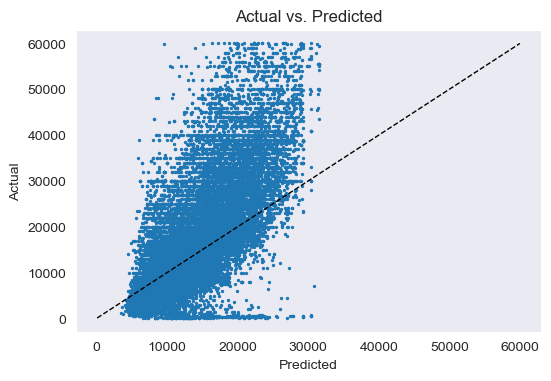

In [25]:
y_predictionL = y_hat_test_LLR
y_actualL = np.exp(y_test)
act_fig, ax = plt.subplots(dpi=100)
sns.set_style("dark")
ax.scatter(y_predictionL, y_actualL, s = 2)
ax.plot([y_actualL.min(), y_actualL.max()], [y_actualL.min(), y_actualL.max()], 'k--', lw=1)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.title('Actual vs. Predicted')
ax.ticklabel_format(style='plain');

In [26]:

# grid3 = {

     
#      'alpha':[.1,.5,.7,1.0],
#     'fit_intercept': [True,False],
#     'copy_X':[True,False],
#     'max_iter':[100, 500,1000]
   



# }
# gs3 = GridSearchCV(estimator=Ridge_Linear_Regression , param_grid=grid3, cv=2)
# gs3.fit(X_train, y_train)
# print(f'Best parameters are {gs3.best_params_}')
# print(f'Best score {gs3.best_score_}')
# print(f'Best estimator score {gs3.best_estimator_.score(X_test, y_test)}')

In [27]:
# Best parameters are {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': 100}

## Tuned Ridge Regression

In [28]:
TunedRLR = Ridge(max_iter=100, random_state=42)
TunedRLR.fit(X_train, y_train)#fitting the model onto the training data
print(TunedRLR.score(X_train,y_train))#printing out the R-squared on the training data

print(TunedRLR.score(X_test,y_test))

# Predicting the price using the model
y_hat_train_RLR = np.exp(TunedRLR.predict(X_train))
#saving the prediction values of the X_train within the variable
y_hat_test_RLR = np.exp(TunedRLR.predict(X_test))
#saving the prediction values of the X_test within the variable

# Saving the mean squared error within these variables, need to use np.exp to unlog the prediction since the target was 
# logged
train_mse_RLR = mean_squared_error(np.exp(y_train), y_hat_train_RLR)
test_mse_RLR = mean_squared_error(np.exp(y_test), y_hat_test_RLR)
# getting the rsme
test_rmse_RLR = np.sqrt(test_mse_RLR)

# printing values
print('Train Mean Squarred Error:', train_mse_RLR)
print('Test Mean Squarred Error:', test_mse_RLR)
print('Test RMSE: ', test_rmse_RLR)

0.6438525253840197
0.6453221190252898
Train Mean Squarred Error: 35633315.10835195
Test Mean Squarred Error: 35554842.65163288
Test RMSE:  5962.788160888569


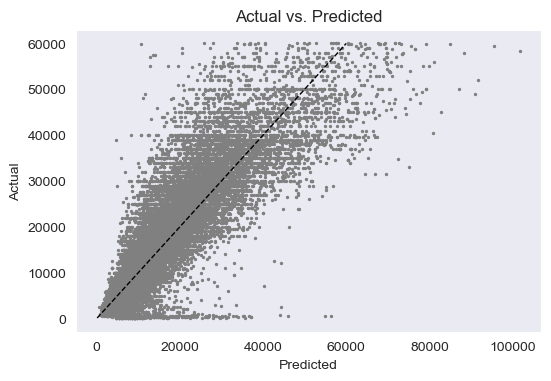

In [70]:
y_predictionR = y_hat_test_s
y_actualR = np.exp(y_test_SL)
act_fig, ax = plt.subplots(dpi=100)
sns.set_style("dark")
ax.scatter(y_predictionR, y_actualR, c='grey', s = 2)
ax.plot([y_actualR.min(), y_actualR.max()], [y_actualR.min(), y_actualR.max()], 'k--', lw=1)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.title('Actual vs. Predicted')
ax.ticklabel_format(style='plain');

## XG Boost Regression

In [30]:
xgboost = xgb.XGBRegressor(random_state=42)
xgboost.fit(X_train, y_train)#fitting the model onto the training data

print(xgboost.score(X_train, y_train))#printing out the R-squared on the training data

print(xgboost.score(X_test, y_test))

# Predicting the price using the model
y_hat_trainXG = np.exp(xgboost.predict(X_train))
#saving the prediction values of the X_train within the variable
y_hat_testXG = np.exp(xgboost.predict(X_test))
#saving the prediction values of the X_test within the variable

# Saving the mean squared error within these variables, need to use np.exp to unlog the prediction since the target was 
# logged
train_mseXG = mean_squared_error(np.exp(y_train), y_hat_trainXG)
test_mseXG = mean_squared_error(np.exp(y_test), y_hat_testXG)
# getting the rsme
test_rmseXG = np.sqrt(test_mseXG)

# printing values
print('Train Mean Squarred Error:', train_mseXG)
print('Test Mean Squarred Error:', test_mseXG)
print('Test RMSE: ', test_rmseXG)

0.7958511580692986
0.7612437435771685
Train Mean Squarred Error: 19460596.19741704
Test Mean Squarred Error: 22087049.62553763
Test RMSE:  4699.686119895416


In [31]:
# grid4 = {

#      'base_score':[.6,.7, 1],
#      'n_estimators': [90,100, 110],
#      'max_depth' : [5,6,7,10]
# }
# gs4= GridSearchCV(estimator=xgboost , param_grid=grid4, cv=5)
# gs4.fit(X_train, y_train)
# print(f'Best parameters are {gs4.best_params_}')
# print(f'Best score {gs4.best_score_}')
# print(f'Best estimator score {gs4.best_estimator_.score(X_test, y_test)}')

## Tuned XG Boost Regression

In [32]:
TunedXG = xgb.XGBRegressor(n_estimators = 100, max_depth = 7, base_score =.6,random_state=42)
TunedXG.fit(X_train, y_train)
print(TunedXG.score(X_train,y_train))#printing out the R-squared on the training data

print(TunedXG.score(X_test,y_test))

# Predicting the price using the model
y_hat_train_TXG = np.exp(TunedXG.predict(X_train))
#saving the prediction values of the X_train within the variable
y_hat_test_TXG = np.exp(TunedXG.predict(X_test))
#saving the prediction values of the X_test within the variable

# Saving the mean squared error within these variables, need to use np.exp to unlog the prediction since the target was 
# logged
train_mse_TXG = mean_squared_error(np.exp(y_train), y_hat_train_TXG)
test_mse_TXG = mean_squared_error(np.exp(y_test), y_hat_test_TXG)
# getting the rsme
test_rmse_TXG = np.sqrt(test_mse_TXG)

# printing values
print('Train Mean Squarred Error:', train_mse_TXG)
print('Test Mean Squarred Error:', test_mse_TXG)
print('Test RMSE: ', test_rmse_TXG)

0.8321493387264695
0.7772718292467858
Train Mean Squarred Error: 17030886.79493091
Test Mean Squarred Error: 20450395.73558834
Test RMSE:  4522.211376703696


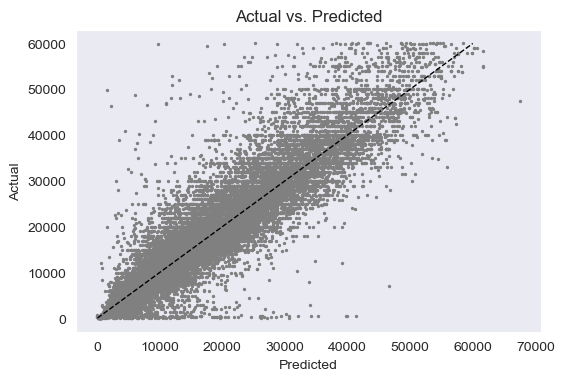

In [71]:
y_predictionXG = y_hat_test_TXG
y_actualXG = np.exp(y_test)
act_fig, ax = plt.subplots(dpi=100)
sns.set_style("dark")
ax.scatter(y_predictionXG, y_actualXG,c='grey', s = 2)
ax.plot([y_actualXG.min(), y_actualXG.max()], [y_actualXG.min(), y_actualXG.max()], 'k--', lw=1)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.title('Actual vs. Predicted')
ax.ticklabel_format(style='plain');

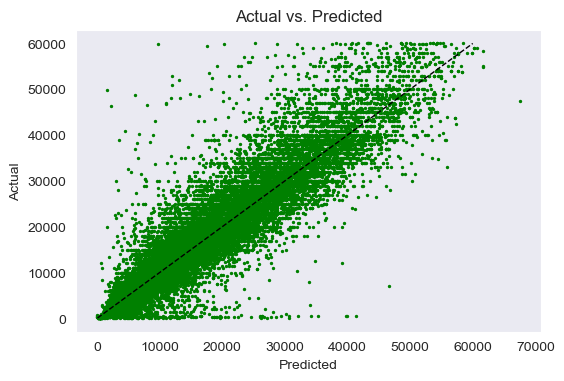

In [73]:
y_predictionXG = y_hat_test_TXG
y_actualXG = np.exp(y_test)
act_fig, ax = plt.subplots(dpi=100)
sns.set_style("dark")
ax.scatter(y_predictionXG, y_actualXG, c='green', s = 2)
ax.plot([y_actualXG.min(), y_actualXG.max()], [y_actualXG.min(), y_actualXG.max()], 'k--', lw=1)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.title('Actual vs. Predicted')
ax.ticklabel_format(style='plain');

## Random Forest Regression

In [35]:
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)

print(random_forest.score(X_train, y_train))#printing out the R-squared on the training data

print(random_forest.score(X_test, y_test))

# Predicting the price using the model
y_hat_trainRF = np.exp(random_forest.predict(X_train))
#saving the prediction values of the X_train within the variable
y_hat_testRF = np.exp(random_forest.predict(X_test))
#saving the prediction values of the X_test within the variable

# Saving the mean squared error within these variables, need to use np.exp to unlog the prediction since the target was 
# logged
train_mseRF = mean_squared_error(np.exp(y_train), y_hat_trainRF)
test_mseRF = mean_squared_error(np.exp(y_test), y_hat_testRF)
# getting the rsme
test_rmseRF = np.sqrt(test_mseRF)

# printing values
print('Train Mean Squarred Error:', train_mseRF)
print('Test Mean Squarred Error:', test_mseRF)
print('Test RMSE: ', test_rmseRF)

0.9734623453943482
0.8227030558408935
Train Mean Squarred Error: 2518417.3759707543
Test Mean Squarred Error: 13872179.297944333
Test RMSE:  3724.537460939859


In [36]:
pickle.dump(random_forest, open('car_price_predictor_model.sav', 'wb'))

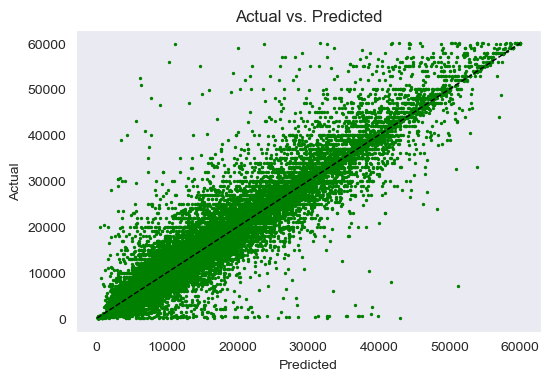

In [49]:
y_predictionrf = y_hat_testRF
y_actualrf = np.exp(y_test)
act_fig, ax = plt.subplots(dpi=100)
sns.set_style("dark")
ax.scatter(y_predictionrf, y_actualrf,c='green', s = 2)
ax.plot([y_actualrf.min(), y_actualrf.max()], [y_actualrf.min(), y_actualrf.max()], 'k--', lw=1)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.title('Actual vs. Predicted')
ax.ticklabel_format(style='plain');

In [50]:
# grid5 = { 
# #     'n_estimators': [90,95,100],
# #     'criterion': ['mse', 'mae'],
#     'max_depth':[7,8,9]

# }
# gs5= GridSearchCV(estimator=xgboost , param_grid=grid5, cv=5)
# gs5.fit(X_train, y_train)
# print(f'Best parameters are {gs5.best_params_}')
# print(f'Best score {gs5.best_score_}')
# print(f'Best estimator score {gs5.best_estimator_.score(X_test, y_test)}')

In [52]:
# Best parameters are {'criterion': 'mse', 'max_depth': 7, 'n_estimators': 100}

## Tuned Random Forest Regression

In [53]:
TunedRF = RandomForestRegressor(max_depth=9,random_state=42)
TunedRF.fit(X_train, y_train)#fitting the model onto the training data
print(TunedRF.score(X_train,y_train))

print(TunedRF.score(X_test,y_test))

# Predicting the price using the model
y_hat_train_TRF = np.exp(TunedRF.predict(X_train))
#saving the prediction values of the X_train within the variable
y_hat_test_TRF = np.exp(TunedRF.predict(X_test))

# Saving the mean squared error within these variables, need to use np.exp to unlog the prediction since the target was 
# logged
train_mse_TRF = mean_squared_error(np.exp(y_train), y_hat_train_TRF)
test_mse_TRF = mean_squared_error(np.exp(y_test), y_hat_test_TRF)
# getting the rsme
test_rmse_TRF = np.sqrt(test_mse_TRF)

# printing values
print('Train Mean Squarred Error:', train_mse_TRF)
print('Test Mean Squarred Error:', test_mse_TRF)
print('Test RMSE: ', test_rmse_TRF)

0.6980234215362835
0.6790243524358708
Train Mean Squarred Error: 30241891.819373064
Test Mean Squarred Error: 31341512.333056904
Test RMSE:  5598.349072097675


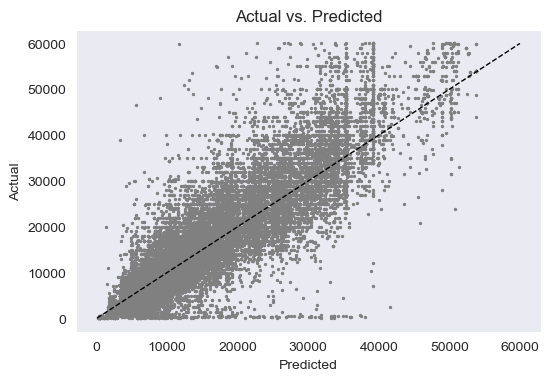

In [76]:
y_predictiontrf = y_hat_test_TRF
y_actualtrf = np.exp(y_test)
act_fig, ax = plt.subplots(dpi=100)
sns.set_style("dark")
ax.scatter(y_predictiontrf, y_actualtrf,c='grey', s = 2)
ax.plot([y_actualtrf.min(), y_actualtrf.max()], [y_actualtrf.min(), y_actualtrf.max()], 'k--', lw=1)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.title('Actual vs. Predicted')
ax.ticklabel_format(style='plain');

## Neural Network Regression

In [54]:
nueral_network = MLPRegressor(random_state=42, verbose=True)
nueral_network.fit(X_train, y_train)#fitting the model onto the training data

print(nueral_network.score(X_train, y_train))

print(nueral_network.score(X_test, y_test))

# Predicting the price using the model
y_hat_train_nn = np.exp(nueral_network.predict(X_train))
#saving the prediction values of the X_train within the variable
y_hat_test_nn = np.exp(nueral_network.predict(X_test))

# Saving the mean squared error within these variables, need to use np.exp to unlog the prediction since the target was 
# logged
train_mse_nn = mean_squared_error(np.exp(y_train), y_hat_train_nn)
test_mse_nn = mean_squared_error(np.exp(y_test), y_hat_test_nn)
# getting the rsme
test_rmse_nn = np.sqrt(test_mse_nn)

# printing values
print('Train Mean Squarred Error:', train_mse_nn)
print('Test Mean Squarred Error:', test_mse_nn)
print('Test RMSE: ', test_rmse_nn)

Iteration 1, loss = 2.63932671
Iteration 2, loss = 0.12702152
Iteration 3, loss = 0.12233311
Iteration 4, loss = 0.11933633
Iteration 5, loss = 0.11573975
Iteration 6, loss = 0.11142845
Iteration 7, loss = 0.10707132
Iteration 8, loss = 0.10360706
Iteration 9, loss = 0.10090035
Iteration 10, loss = 0.09922450
Iteration 11, loss = 0.09645783
Iteration 12, loss = 0.09493892
Iteration 13, loss = 0.09338703
Iteration 14, loss = 0.09230605
Iteration 15, loss = 0.09073090
Iteration 16, loss = 0.08973349
Iteration 17, loss = 0.08909618
Iteration 18, loss = 0.08813970
Iteration 19, loss = 0.08695983
Iteration 20, loss = 0.08669785
Iteration 21, loss = 0.08569487
Iteration 22, loss = 0.08479657
Iteration 23, loss = 0.08469603
Iteration 24, loss = 0.08414103
Iteration 25, loss = 0.08357535
Iteration 26, loss = 0.08323556
Iteration 27, loss = 0.08274858
Iteration 28, loss = 0.08254176
Iteration 29, loss = 0.08237044
Iteration 30, loss = 0.08187007
Iteration 31, loss = 0.08159772
Iteration 32, los

C:\Users\roger\anaconda3\envs\learn-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8304912759469802
0.7309316882664962
Train Mean Squarred Error: 18675044.82837997
Test Mean Squarred Error: 25362095.69420056
Test RMSE:  5036.079397130327


In [55]:
# grid = {

     
#      'solver':['lbfgs', 'adam'],
#     'alpha':[.001,.01],
#     'max_iter':[50,100],
#      'verbose':[True],

# }
# gs= GridSearchCV(estimator=nueral_network , param_grid=grid, cv=2)
# gs.fit(X_train, y_train)
# print(f'Best parameters are {gs.best_params_}')
# print(f'Best score {gs.best_score_}')
# print(f'Best estimator score {gs.best_estimator_.score(X_test, y_test)}')

In [ ]:
# Best parameters are {'alpha': 1, 'max_iter': 50, 'solver': 'adam'}

## Tuned Neural Network

In [56]:
TunedNN = MLPRegressor(alpha= 0.01, max_iter= 50, solver= 'adam', verbose= True, random_state=42)
TunedNN.fit(X_train, y_train)#fitting the model onto the training data
print(TunedNN.score(X_train,y_train))

print(TunedNN.score(X_test,y_test))

# Predicting the price using the model
y_hat_train_NN = np.exp(TunedNN.predict(X_train))
#saving the prediction values of the X_train within the variable
y_hat_test_NN = np.exp(TunedNN.predict(X_test))

# Saving the mean squared error within these variables, need to use np.exp to unlog the prediction since the target was 
# logged
train_mse_NN = mean_squared_error(np.exp(y_train), y_hat_train_NN)
test_mse_NN = mean_squared_error(np.exp(y_test), y_hat_test_NN)
# getting the rsme
test_rmse_NN = np.sqrt(test_mse_NN)

# printing values
print('Train Mean Squarred Error:', train_mse_NN)
print('Test Mean Squarred Error:', test_mse_NN)
print('Test RMSE: ', test_rmse_NN)

Iteration 1, loss = 2.64144820
Iteration 2, loss = 0.13125797
Iteration 3, loss = 0.12857085
Iteration 4, loss = 0.12356930
Iteration 5, loss = 0.11922683
Iteration 6, loss = 0.11453456
Iteration 7, loss = 0.11054957
Iteration 8, loss = 0.10770727
Iteration 9, loss = 0.10536370
Iteration 10, loss = 0.10397041
Iteration 11, loss = 0.10163426
Iteration 12, loss = 0.10047924
Iteration 13, loss = 0.09916111
Iteration 14, loss = 0.09830676
Iteration 15, loss = 0.09702253
Iteration 16, loss = 0.09624024
Iteration 17, loss = 0.09583645
Iteration 18, loss = 0.09493197
Iteration 19, loss = 0.09404993
Iteration 20, loss = 0.09373314
Iteration 21, loss = 0.09295001
Iteration 22, loss = 0.09216390
Iteration 23, loss = 0.09219021
Iteration 24, loss = 0.09176772
Iteration 25, loss = 0.09119345
Iteration 26, loss = 0.09085784
Iteration 27, loss = 0.09045567
Iteration 28, loss = 0.09038904
Iteration 29, loss = 0.09035199
Iteration 30, loss = 0.08969406
Iteration 31, loss = 0.08956303
Iteration 32, los

C:\Users\roger\anaconda3\envs\learn-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7822158328202053
0.7448344762967434
Train Mean Squarred Error: 22592917.86572118
Test Mean Squarred Error: 25429310.914358865
Test RMSE:  5042.748349299107


In [57]:
regression_score = pd.DataFrame(index=['Linear', 'Lasso', 'Ridge', 'XGBoost', 'Neural_NetWork', 'Random_forest'], columns=['test R^2'])
regression_score['test R^2'] = [SimpleLinearRegression.score(X_test_SL,y_test_SL),
                                Lasso_Linear_Regression.score(X_test_L,y_test_L),
                                Ridge_Linear_Regression.score(X_test_R,y_test_R),
                                xgboost.score(X_test, y_test),
                                nueral_network.score(X_test, y_test),
                                random_forest.score(X_test, y_test)]


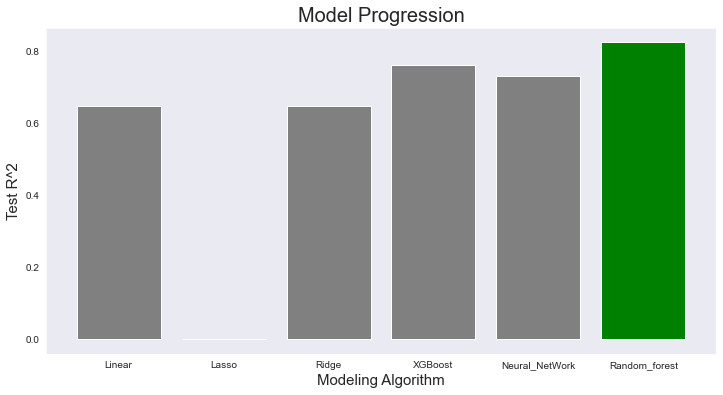

In [58]:
model_score_fig, ax = plt.subplots(figsize=(12,6))
sns.set_style("dark")

ax.bar(regression_score.index, regression_score['test R^2'], color=["grey", "red", "grey", "grey", "grey",'green'])
plt.title('Model Progression', size=20)
plt.xlabel('Modeling Algorithm', size=15)
plt.ylabel('Test R^2', size=15);
# plt.savefig('images/model_prog.png', bbox_inches = 'tight');

In [59]:
regression_score_tuned = pd.DataFrame(index=['Linear-Tuned', 'Lasso-Tuned', 'Ridge-Tuned', 'XGBoost-Tuned', 'Neural_NetWork-Tuned', 'Random_Forest-Tuned'], columns=['test R^2'])
regression_score_tuned['test R^2'] = [TunedLR.score(X_test_TL, y_test_TL),
                                TunedLLR.score(X_test,y_test),
                                TunedRLR.score(X_test,y_test),
                                TunedXG.score(X_test,y_test),
                                TunedNN.score(X_test,y_test),
                                TunedRF.score(X_test,y_test)]

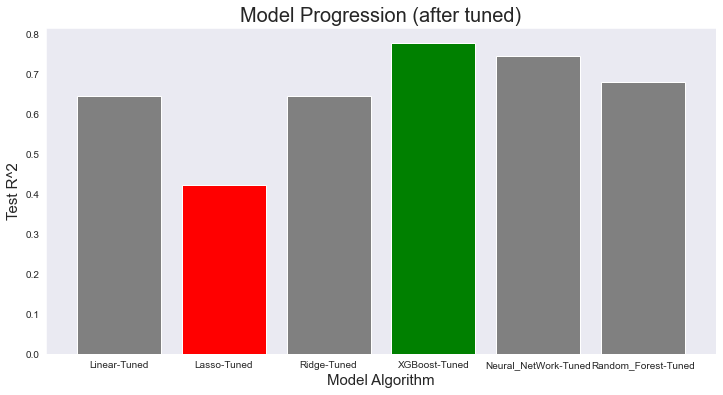

In [60]:
model_score_figT, ax = plt.subplots(figsize=(12,6))
sns.set_style("dark")

ax.bar(regression_score_tuned.index, regression_score_tuned['test R^2'], color=["grey", "red", "grey", "green", "grey",'grey'])
plt.title('Model Progression (after tuned)', size=20)
plt.xlabel('Model Algorithm', size=15)
plt.ylabel('Test R^2', size=15);

In [61]:
rsme = pd.DataFrame(index=['Linear', 'Lasso', 'Ridge', 'XGBoost', 'Neural_NetWork', 'Random_Forest'], columns=['RSME'])
rsme['RSME'] = [test_rmse_s, test_rmse_sl,test_rmse_sr,test_rmseXG,test_rmse_nn,test_rmseRF]


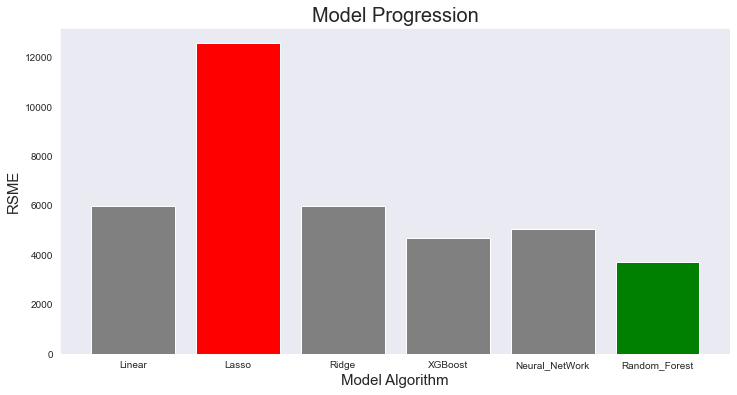

In [62]:
rsmev, ax = plt.subplots(figsize=(12,6))
sns.set_style("dark")

ax.bar(rsme.index, rsme['RSME'], color=["grey", "red", "grey", "grey", "grey",'green'])
plt.title('Model Progression', size=20)
plt.xlabel('Model Algorithm', size=15)
plt.ylabel('RSME', size=15);

In [63]:
rsme_tuned = pd.DataFrame(index=['Linear-Tuned', 'Lasso-Tuned', 'Ridge-Tuned', 'XGBoost-Tuned', 'Neural_NetWork-Tuned', 'Random_Forest-Tuned'], columns=['RSME'])
rsme_tuned['RSME'] = [test_rmse_TLR, test_rmse_LLR,test_rmse_RLR,test_rmse_TXG,test_rmse_TRF,test_rmse_NN]

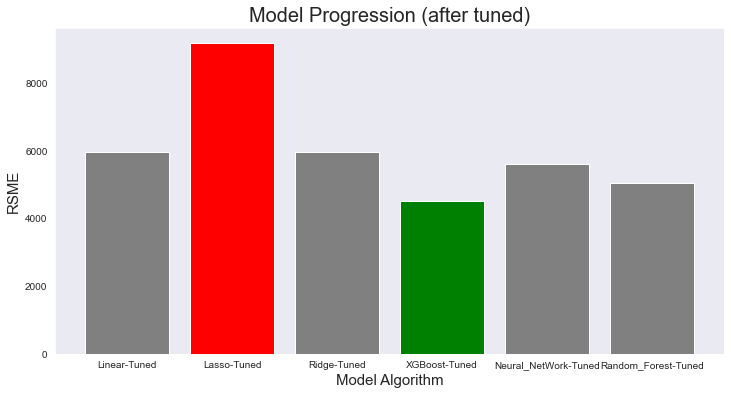

In [64]:
rsmeT, ax = plt.subplots(figsize=(12,6))
sns.set_style("dark")

ax.bar(rsme_tuned.index, rsme_tuned['RSME'], color=["grey", "red", "grey", "green", "grey",'grey'])
plt.title('Model Progression (after tuned)', size=20)
plt.xlabel('Model Algorithm', size=15)
plt.ylabel('RSME', size=15);

Final Model is untuned Random Forest Regressor

In [ ]:
pickle.dump(random_forest, open('car_price_predictor_model.sav', 'wb'))